# Cardiovascular Disease Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import sklearn
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('cardio.csv')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
data.shape

(70000, 13)

In [6]:
data = data[:1000]

In [7]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender       1000 non-null   int64  
 3   height       1000 non-null   int64  
 4   weight       1000 non-null   float64
 5   ap_hi        1000 non-null   int64  
 6   ap_lo        1000 non-null   int64  
 7   cholesterol  1000 non-null   int64  
 8   gluc         1000 non-null   int64  
 9   smoke        1000 non-null   int64  
 10  alco         1000 non-null   int64  
 11  active       1000 non-null   int64  
 12  cardio       1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


## Univariate and Bivariate Analysis

In [9]:
data.drop('id', axis=1, inplace=True)

In [10]:
data.describe(include='all')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,19431.52100,1.359000,164.102000,74.734300,127.463000,92.655000,1.393000,1.241000,0.095000,0.04600,0.778000,0.507000
std,2521.04067,0.479947,8.363704,15.259966,18.106918,102.072635,0.697881,0.589293,0.293362,0.20959,0.415799,0.500201
min,14321.00000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,17509.50000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,19666.00000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
75%,21367.25000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,23661.00000,2.000000,188.000000,200.000000,200.000000,1100.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.021964,-0.135350,-0.036401,0.168890,0.017831,0.174758,0.092423,-0.057745,-0.034964,-0.006617,0.244924
gender,-0.021964,1.000000,0.474146,0.118317,0.037525,0.019735,-0.009226,-0.001837,0.361837,0.144151,-0.011547,-0.050090
height,-0.135350,0.474146,1.000000,0.345924,0.015796,0.012136,-0.013734,0.020395,0.179635,0.098395,-0.052777,0.004375
weight,-0.036401,0.118317,0.345924,1.000000,0.183954,0.055301,0.132571,0.073093,0.014476,0.033871,-0.042435,0.136020
ap_hi,0.168890,0.037525,0.015796,0.183954,1.000000,0.249530,0.272662,0.056889,0.025443,0.027353,-0.034597,0.460791
ap_lo,0.017831,0.019735,0.012136,0.055301,0.249530,1.000000,0.013484,-0.010199,0.062471,-0.019892,-0.032161,0.142649
cholesterol,0.174758,-0.009226,-0.013734,0.132571,0.272662,0.013484,1.000000,0.453424,0.013030,0.006310,0.038794,0.288901
gluc,0.092423,-0.001837,0.020395,0.073093,0.056889,-0.010199,0.453424,1.000000,-0.022553,-0.000697,0.038818,0.114827
smoke,-0.057745,0.361837,0.179635,0.014476,0.025443,0.062471,0.013030,-0.022553,1.000000,0.384702,0.041770,-0.021590
alco,-0.034964,0.144151,0.098395,0.033871,0.027353,-0.019892,0.006310,-0.000697,0.384702,1.000000,0.013921,-0.022171


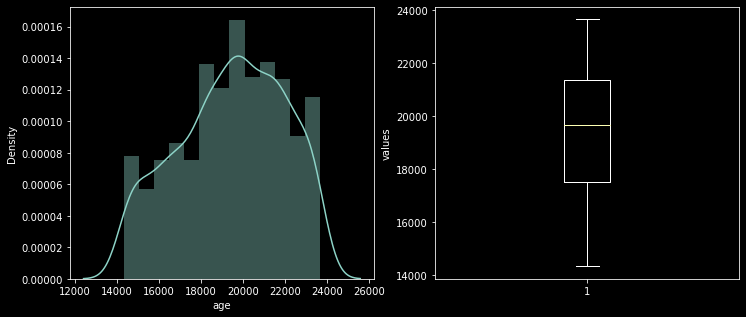

In [13]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.age)
fig.add_subplot(1,2,2)
plt.boxplot(data.age)
plt.ylabel('values')
plt.show()

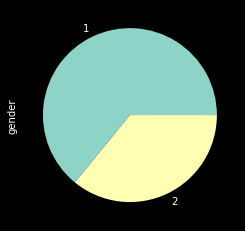

In [14]:
data.gender.value_counts().plot(kind='pie')
plt.show()

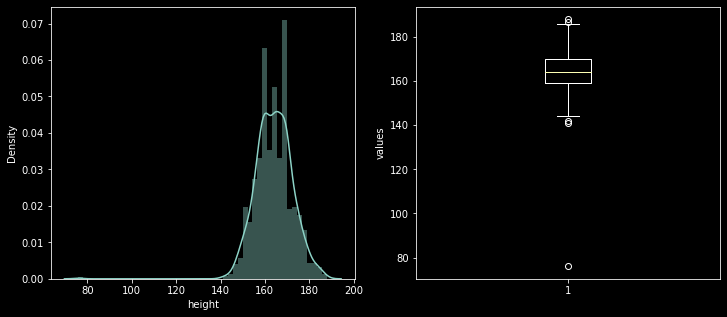

In [15]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.height)
fig.add_subplot(1,2,2)
plt.boxplot(data.height)
plt.ylabel('values')
plt.show()

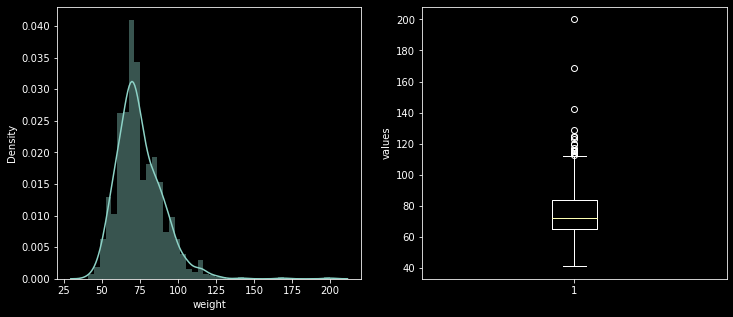

In [16]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.weight)
fig.add_subplot(1,2,2)
plt.boxplot(data.weight)
plt.ylabel('values')
plt.show()

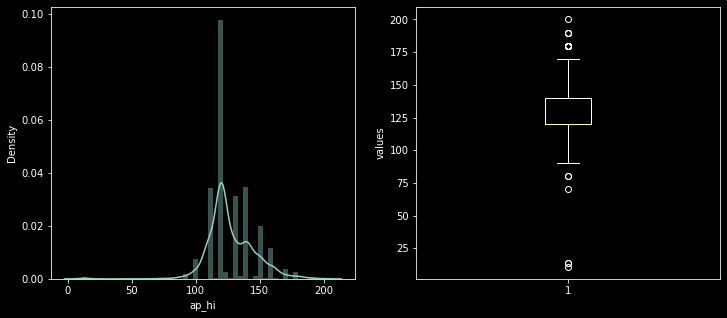

In [17]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.ap_hi)
fig.add_subplot(1,2,2)
plt.boxplot(data.ap_hi)
plt.ylabel('values')
plt.show()

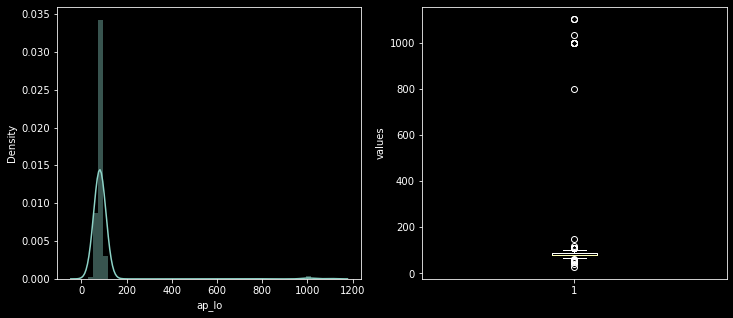

In [18]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.ap_lo)
fig.add_subplot(1,2,2)
plt.boxplot(data.ap_lo)
plt.ylabel('values')
plt.show()

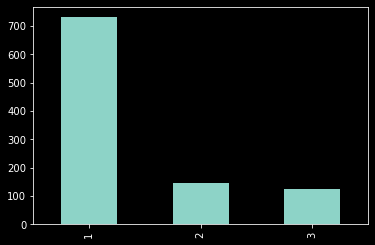

In [19]:
data.cholesterol.value_counts().plot(kind='bar')
plt.show()

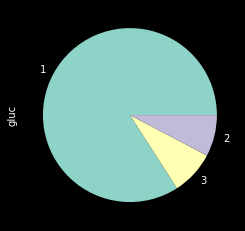

In [20]:
data.gluc.value_counts().plot(kind='pie')
plt.show()

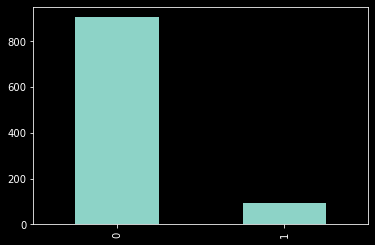

In [21]:
data.smoke.value_counts().plot(kind='bar')
plt.show()

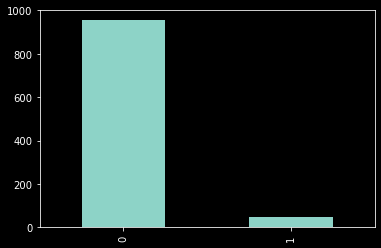

In [22]:
data.alco.value_counts().plot(kind='bar')
plt.show()

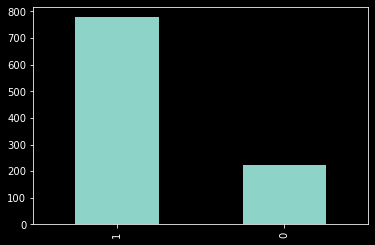

In [23]:
data.active.value_counts().plot(kind='bar')
plt.show()

In [24]:
data.cardio.value_counts()

1    507
0    493
Name: cardio, dtype: int64

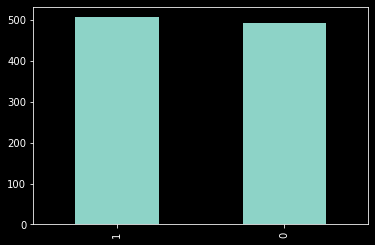

In [25]:
data.cardio.value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

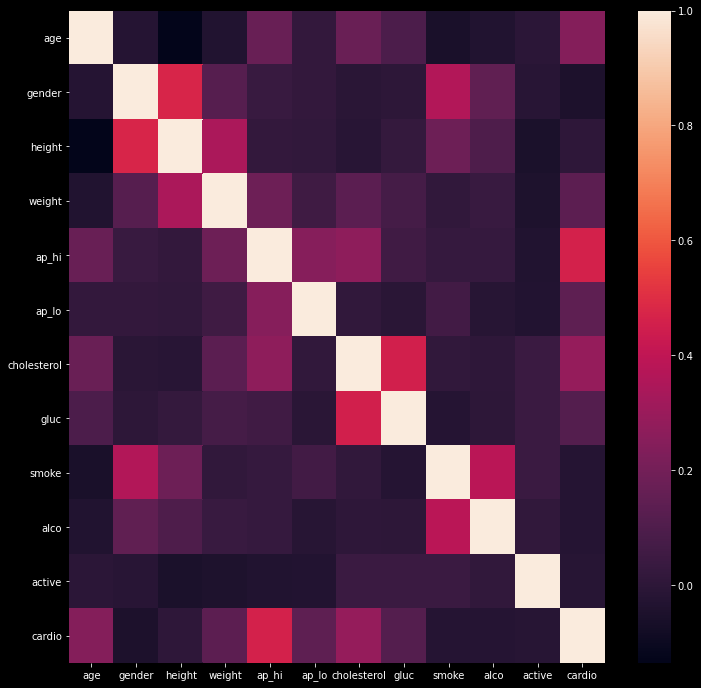

In [26]:
cor = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

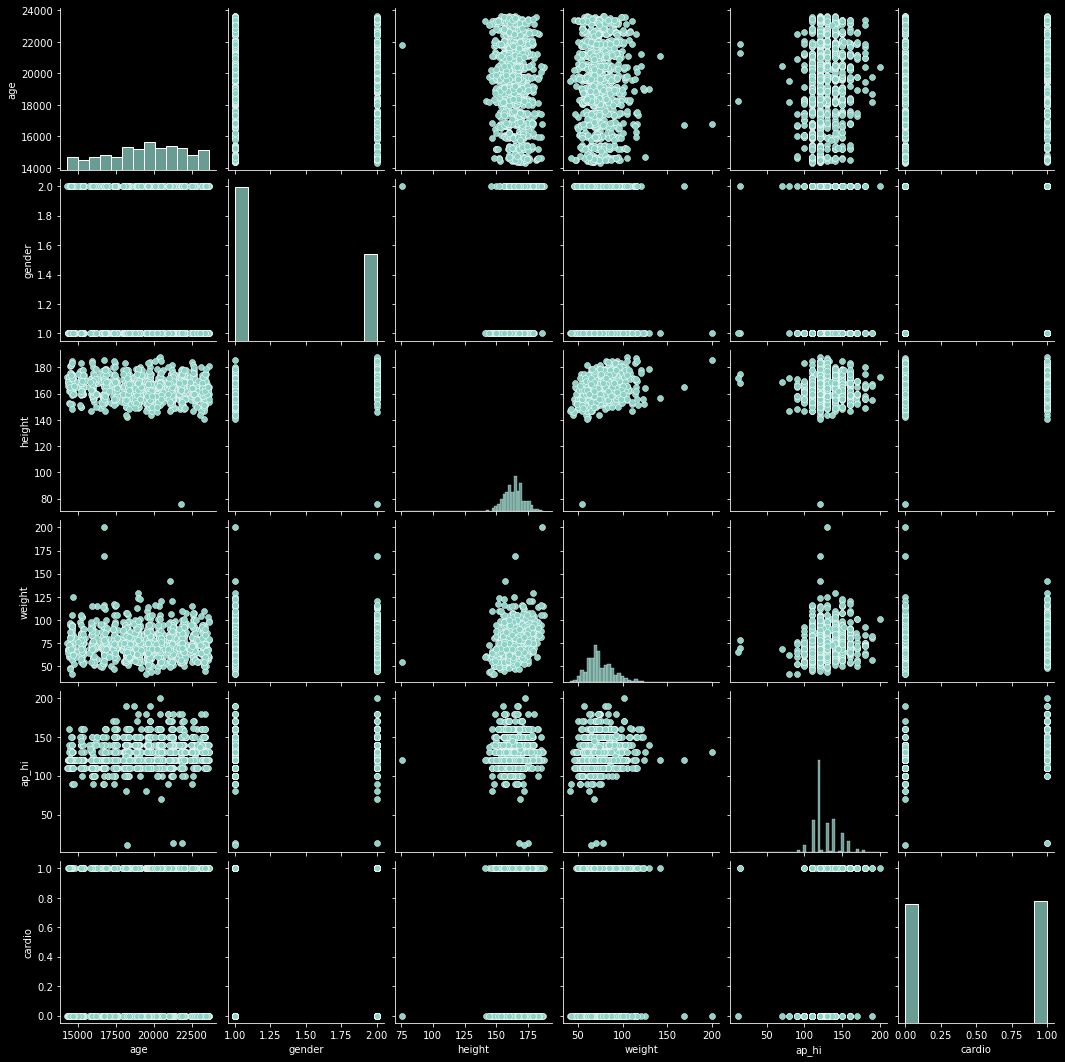

In [27]:
sns.pairplot(data, vars=['age', 'gender', 'height', 'weight', 'ap_hi', 'cardio'])

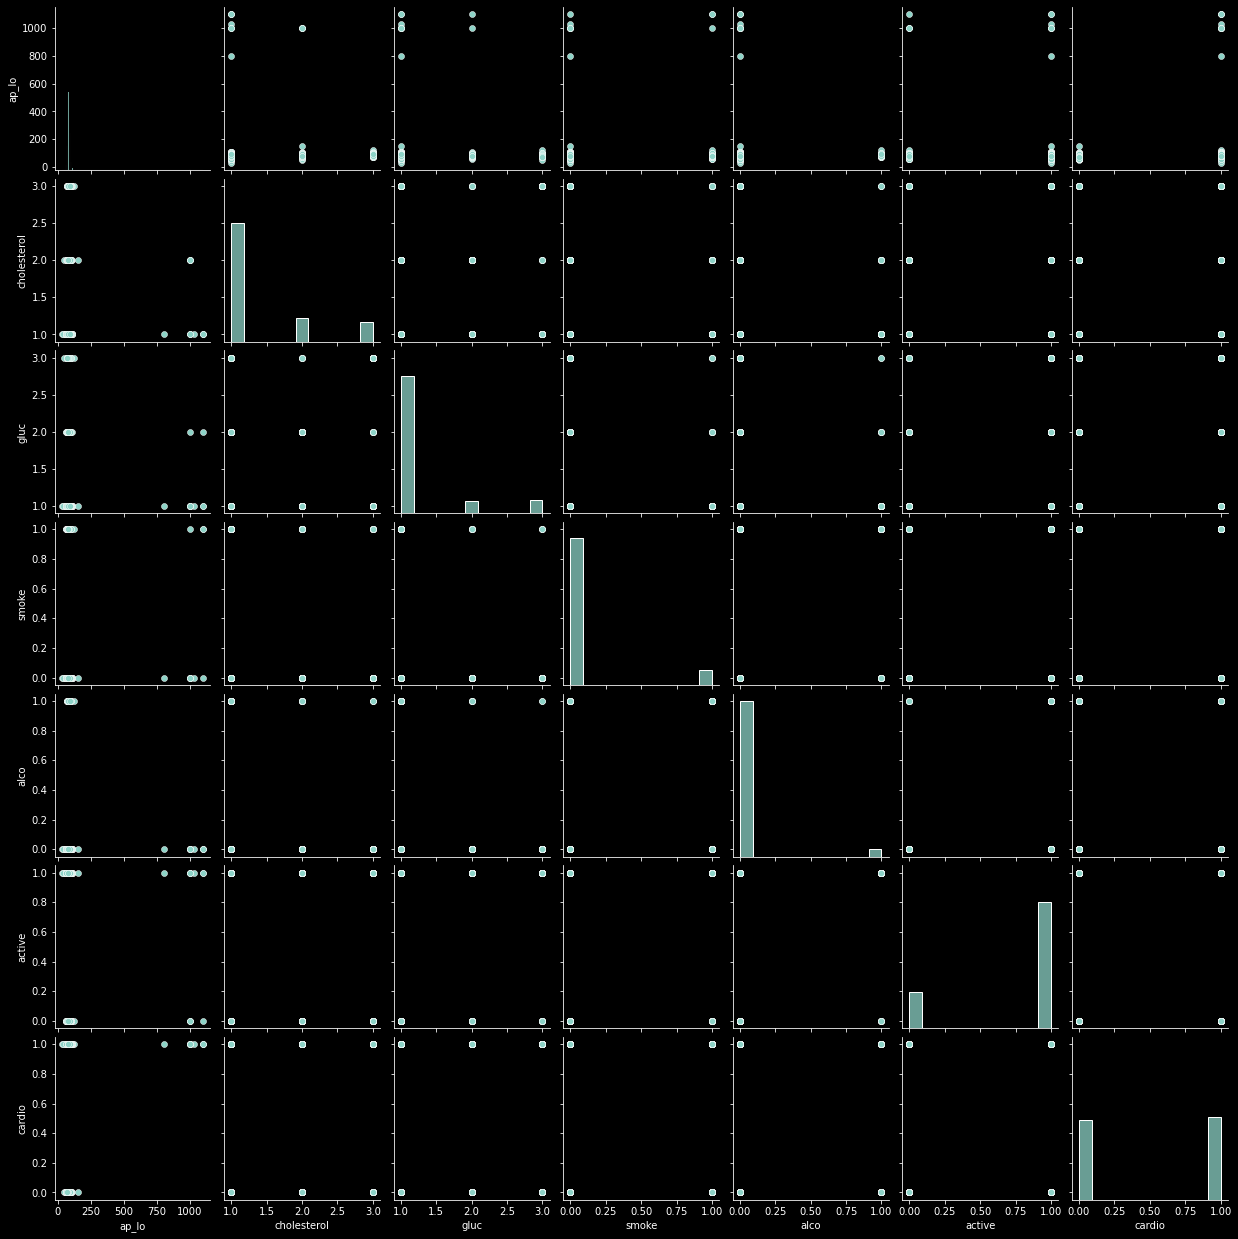

In [28]:
sns.pairplot(data, vars=['ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [29]:
X = data.drop(columns=['cardio'])
Y = pd.DataFrame(data.cardio)

In [30]:
X.shape

(1000, 11)

In [31]:
Y.shape

(1000, 1)

## Splitting the data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [34]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 11), (200, 11), (800, 1), (200, 1))

## Creating the model

### Without Preprocessing

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
mlp = MLPClassifier(random_state=42)

In [37]:
mlp.fit(X_train, Y_train)

MLPClassifier(random_state=42)

In [38]:
mlp.score(X_test, Y_test)

0.545

### With preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [40]:
mlp = MLPClassifier(random_state=42)

In [41]:
mlp.fit(X_train, Y_train)

MLPClassifier(random_state=42)

In [42]:
mlp.score(X_test, Y_test)

0.73

In [43]:
mlp.coefs_

[array([[ 0.19085673,  0.26276012,  0.15516664, ..., -0.10953764,
         -0.21342715, -0.29309262],
        [-0.23790047,  0.1196806 ,  0.04396722, ...,  0.16144986,
          0.31162653,  0.1677035 ],
        [ 0.24091394, -0.15403555, -0.13410125, ..., -0.0630378 ,
         -0.09960946, -0.21187588],
        ...,
        [ 0.17589544, -0.04430963,  0.024332  , ...,  0.19202094,
         -0.2576887 , -0.21059621],
        [-0.04109721, -0.22284675, -0.15707434, ..., -0.09082863,
          0.13288232, -0.171274  ],
        [-0.10464251, -0.06952365,  0.00811094, ..., -0.04128146,
          0.08726845, -0.20308971]]),
 array([[ 0.42678391],
        [-0.23383761],
        [-0.20663719],
        [-0.01276077],
        [-0.06594369],
        [ 0.3111158 ],
        [ 0.23483999],
        [-0.12509378],
        [-0.15582299],
        [ 0.53209386],
        [-0.21264399],
        [ 0.15431638],
        [-0.20371449],
        [ 0.35597423],
        [ 0.20946935],
        [-0.19812559],
     

In [44]:
mlp.intercepts_

[array([-4.11942583e-01,  1.97416571e-01,  1.54064716e-01,  1.63354951e-01,
         1.26444663e-01, -1.04599235e-01, -1.02426888e-01,  1.90508318e-01,
         8.72995348e-02, -1.01864823e-01,  9.66804849e-02, -1.94695767e-01,
        -2.57601553e-01,  1.30488947e-01,  1.17455528e-01,  6.54595901e-02,
        -2.06532107e-01,  2.46729860e-01, -3.70852216e-02, -2.40135675e-01,
         2.73246971e-01,  1.81866702e-01,  1.72887525e-01,  1.78435804e-01,
         1.53547623e-01,  1.04639707e-01, -2.12542977e-01, -1.33346493e-01,
         5.20165291e-02, -1.19159767e-01,  6.21521218e-02, -7.71104592e-02,
        -2.50070979e-01, -7.00379498e-02,  3.34894839e-02, -2.65334047e-01,
         2.15980367e-01,  2.80696772e-01,  8.03506021e-02,  6.91741352e-02,
         8.99201548e-02,  2.43571954e-02,  1.23488970e-01,  8.61820820e-02,
        -2.58525565e-04,  2.57235731e-01,  1.04506068e-01,  7.67641935e-02,
         1.77981941e-01,  1.05581151e-01,  1.16020219e-01,  2.34456772e-01,
         5.9

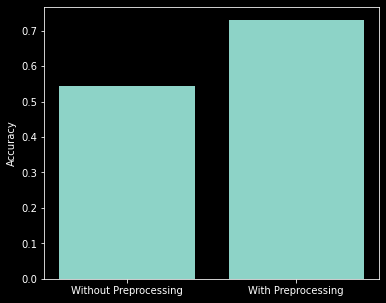

In [45]:
plt.figure(figsize=(6, 5))
plt.bar(['Without Preprocessing', 'With Preprocessing'], [0.545, 0.73])
plt.ylabel('Accuracy')
plt.show()

## Hyper parameter Tuning

### Number of Neurons in hidden layer

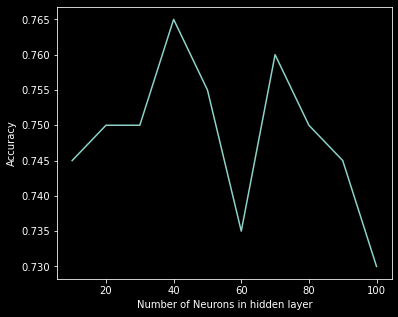

In [46]:
neu_num = []
neu_score = []
for i in range(10,101,10):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), random_state=42)
    mlp.fit(X_train, Y_train)
    neu_score.append(mlp.score(X_test, Y_test))
    neu_num.append(i)
    
plt.figure(figsize=(6, 5))
plt.plot(neu_num, neu_score)
plt.xlabel('Number of Neurons in hidden layer')
plt.ylabel('Accuracy')
plt.show()

In [47]:
max(neu_score)

0.765

In [48]:
neu_score[3]

0.765

In [49]:
neu_num[3]

40

### Activation Function

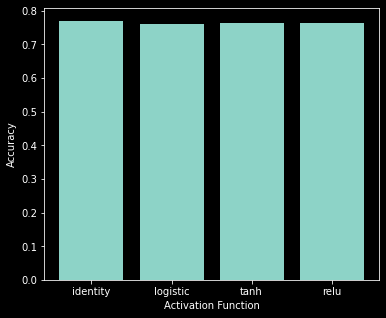

In [50]:
func = ['identity', 'logistic', 'tanh', 'relu']
ac_score = []
for i in func:
    mlp = MLPClassifier(hidden_layer_sizes=(40,), activation=i, random_state=42)
    mlp.fit(X_train, Y_train)
    ac_score.append(mlp.score(X_test, Y_test))
    
plt.figure(figsize=(6, 5))
plt.bar(func, ac_score)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.show()

In [51]:
max(ac_score)

0.77

In [52]:
ac_score[0]

0.77

### Number of layers

#### With 2 hidden layers

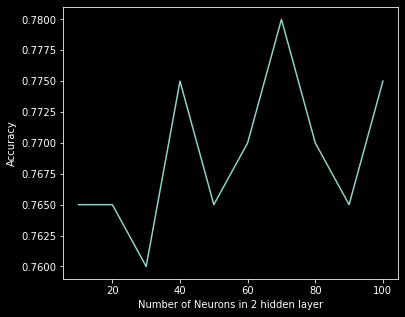

In [53]:
lay2_num = []
lay2_score = []
for i in range(10,101,10):
    mlp = MLPClassifier(hidden_layer_sizes=(40,i), activation='identity', random_state=42)
    mlp.fit(X_train, Y_train)
    lay2_score.append(mlp.score(X_test, Y_test))
    lay2_num.append(i)
    
plt.figure(figsize=(6, 5))
plt.plot(lay2_num, lay2_score)
plt.xlabel('Number of Neurons in 2 hidden layer')
plt.ylabel('Accuracy')
plt.show()

In [54]:
max(lay2_score)

0.78

In [55]:
lay2_score[6]

0.78

In [56]:
lay2_num[6]

70

#### With 3 hidden layers

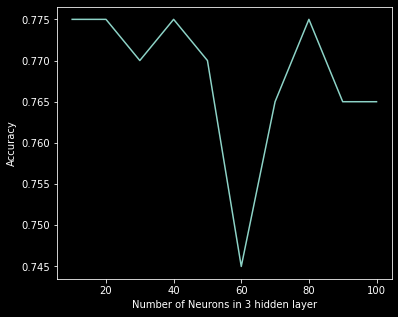

In [57]:
lay3_num = []
lay3_score = []
for i in range(10,101,10):
    mlp = MLPClassifier(hidden_layer_sizes=(40,70,i), activation='identity', random_state=42)
    mlp.fit(X_train, Y_train)
    lay3_score.append(mlp.score(X_test, Y_test))
    lay3_num.append(i)
    
plt.figure(figsize=(6, 5))
plt.plot(lay3_num, lay3_score)
plt.xlabel('Number of Neurons in 3 hidden layer')
plt.ylabel('Accuracy')
plt.show()

In [58]:
max(lay3_score)

0.775

### Solver

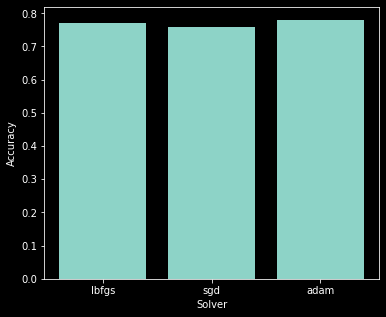

In [59]:
so = ['lbfgs', 'sgd', 'adam']
so_score = []
for i in so:
    mlp = MLPClassifier(hidden_layer_sizes=(40,70), activation='identity', solver=i,
                        random_state=42)
    mlp.fit(X_train, Y_train)
    so_score.append(mlp.score(X_test, Y_test))
    
plt.figure(figsize=(6, 5))
plt.bar(so, so_score)
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.show()

In [60]:
max(so_score)

0.78

In [61]:
so_score[2]

0.78

### Learning Rate

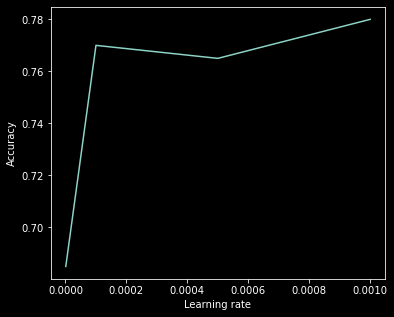

In [62]:
lr = [0.000001, 0.0001, 0.0005, 0.001]
lr_score = []
for i in lr:
    mlp = MLPClassifier(hidden_layer_sizes=(40,70), activation='identity', solver='adam', learning_rate_init=i,
                        random_state=42)
    mlp.fit(X_train, Y_train)
    lr_score.append(mlp.score(X_test, Y_test))
    
plt.figure(figsize=(6, 5))
plt.plot(lr, lr_score)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()

In [63]:
max(lr_score)

0.78

In [64]:
lr_score[3]

0.78

### Alpha Value

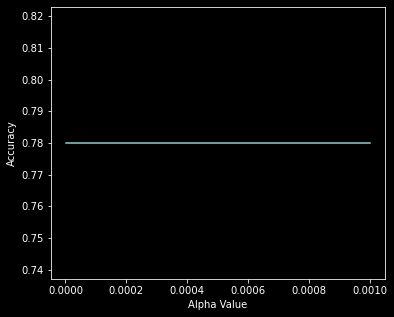

In [65]:
alpha = [0.000001, 0.0001, 0.0005, 0.001]
al_score = []
for i in alpha:
    mlp = MLPClassifier(hidden_layer_sizes=(40,70), activation='identity', solver='adam', learning_rate_init=0.001,
                        alpha=i, random_state=42)
    mlp.fit(X_train, Y_train)
    al_score.append(mlp.score(X_test, Y_test))
    
plt.figure(figsize=(6, 5))
plt.plot(alpha, al_score)
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')
plt.show()

In [66]:
max(al_score)

0.78

In [67]:
al_score[1]

0.78

In [68]:
alpha[1]

0.0001

## Final Model

In [69]:
mlp = MLPClassifier(hidden_layer_sizes=(40,70), activation='identity', solver='adam', learning_rate_init=0.001,
                        alpha=0.000001, random_state=42)
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test)

0.78

In [70]:
Y_pred = mlp.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[74, 17],
       [27, 82]], dtype=int64)

In [71]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        91
           1       0.83      0.75      0.79       109

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [72]:
mlp.intercepts_

[array([-0.27404145,  0.35040936, -0.07945189, -0.09365412,  0.19852939,
         0.31668788,  0.338889  ,  0.16653783, -0.07950083, -0.27069782,
         0.19803016,  0.04618022, -0.04194409,  0.28170046, -0.25107719,
        -0.00058282, -0.32662432, -0.01116404, -0.31003427, -0.25474493,
        -0.26695864,  0.09392965,  0.18075728,  0.06539983,  0.31921023,
        -0.09432234, -0.13818773,  0.24840592, -0.20002794,  0.32257047,
        -0.32855796,  0.31991617, -0.30185495,  0.26145614,  0.01086089,
         0.34363718, -0.29726948,  0.04992778,  0.31679997,  0.02877603]),
 array([-0.01597749, -0.13999615,  0.15934506,  0.16347115, -0.00908595,
        -0.19184444, -0.05901026,  0.14785224,  0.18110701, -0.14474849,
        -0.20859702,  0.18305067, -0.05805897,  0.02606161,  0.21195276,
        -0.20852504,  0.07632053, -0.19267183, -0.0514716 ,  0.13507626,
        -0.02467738,  0.22479411,  0.03388069, -0.0904666 , -0.13720536,
        -0.07657582, -0.06581382, -0.19493774, -0

In [73]:
mlp.coefs_

[array([[-0.08010304,  0.32779256,  0.16033939,  0.06662873, -0.25118676,
         -0.22537034, -0.30176526,  0.24835618,  0.06977255,  0.14892141,
         -0.32473586,  0.32370906,  0.22534637, -0.19815515, -0.20121559,
         -0.21733926, -0.13054853,  0.02263174, -0.04832879, -0.14078675,
          0.07666114, -0.25090445, -0.13319878, -0.0894678 , -0.03245814,
          0.18998828, -0.19716744,  0.01021311,  0.05239585, -0.31050747,
          0.07510516, -0.22290428, -0.29186224,  0.30497555,  0.3156303 ,
          0.21242065, -0.13407644, -0.25751591,  0.12600092, -0.02967891],
        [-0.24913368, -0.00228296, -0.32208125,  0.28574377, -0.16608652,
          0.10342098, -0.13469429,  0.01784354,  0.02694844, -0.2026158 ,
          0.31688821,  0.18299447,  0.29730498,  0.2628806 ,  0.06930676,
          0.28365192, -0.28335868, -0.21019346, -0.3055396 , -0.12212918,
         -0.06830061, -0.15075754,  0.21400198, -0.10686413, -0.1592312 ,
          0.03372137, -0.23139246,  0

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        91
           1       0.83      0.75      0.79       109

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [75]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [76]:
specificity = tn / (tn+fp)
print('The specificity score is {}'.format(specificity))

The specificity score is 0.8131868131868132


In [77]:
sensitivity = tp / (tp+fn)
print('The sensitivty score is {}'.format(sensitivity))

The sensitivty score is 0.7522935779816514


In [78]:
precision = tp / (tp+fp)
print('The precision score is {}'.format(precision))

The precision score is 0.8282828282828283


In [79]:
recall = tp / (tp+fn)
print('The recall score is {}'.format(recall))

The recall score is 0.7522935779816514


In [80]:
f1 = (2 * precision * recall)/(precision+recall)
print('The F1 score is {}'.format(f1))

The F1 score is 0.7884615384615384


No Skill: ROC AUC=0.500
MLP: ROC AUC=0.836


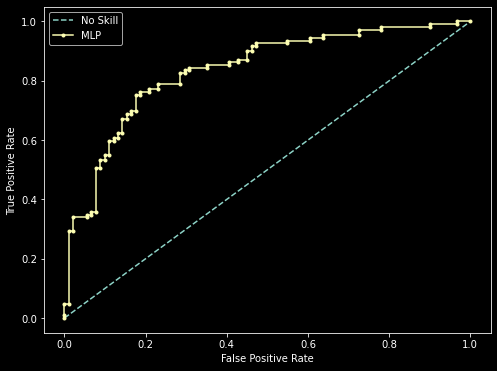

In [81]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = mlp.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(8, 6))

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [82]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(Y_test, Y_pred)
print('The Kappa Statistics score is {}'.format(kappa))

The Kappa Statistics score is 0.5603956439204716


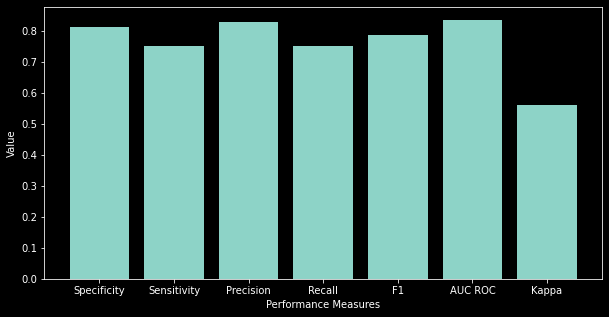

In [83]:
plt.figure(figsize=(10, 5))
plt.bar(['Specificity', 'Sensitivity', 'Precision', 'Recall', 'F1', 'AUC ROC', 'Kappa'], 
         [specificity, sensitivity, precision, recall, f1, lr_auc, kappa])
plt.xlabel('Performance Measures')
plt.ylabel('Value')
plt.show()

# Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

## GaussianNB

In [85]:
gnb = GaussianNB()

In [86]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [87]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [88]:
gnb.score(X_test, Y_test)

0.65

In [89]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70        91
           1       0.84      0.44      0.58       109

    accuracy                           0.65       200
   macro avg       0.71      0.67      0.64       200
weighted avg       0.72      0.65      0.63       200



In [90]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [91]:
confusion_matrix(Y_test, y_pred)

array([[82,  9],
       [61, 48]], dtype=int64)

In [92]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

In [93]:
specificity = tn / (tn+fp)
print('The specificity score is {}'.format(specificity))

The specificity score is 0.9010989010989011


In [94]:
sensitivity = tp / (tp+fn)
print('The sensitivty score is {}'.format(sensitivity))

The sensitivty score is 0.44036697247706424


In [95]:
precision = tp / (tp+fp)
print('The precision score is {}'.format(precision))

The precision score is 0.8421052631578947


In [96]:
recall = tp / (tp+fn)
print('The recall score is {}'.format(recall))

The recall score is 0.44036697247706424


In [97]:
f1 = (2 * precision * recall)/(precision+recall)
print('The F1 score is {}'.format(f1))

The F1 score is 0.5783132530120482


No Skill: ROC AUC=0.500
GNB: ROC AUC=0.794


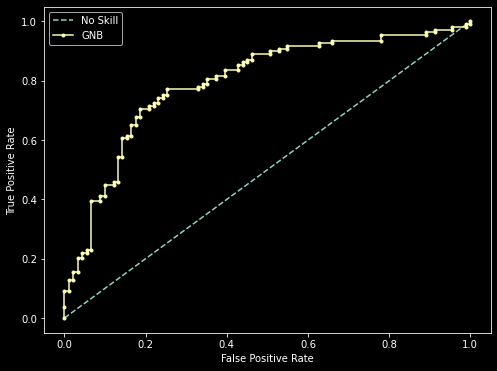

In [98]:
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = gnb.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GNB: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(8, 6))

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GNB')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [99]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(Y_test, y_pred)
print('The Kappa Statistics score is {}'.format(kappa))

The Kappa Statistics score is 0.3260806777702898


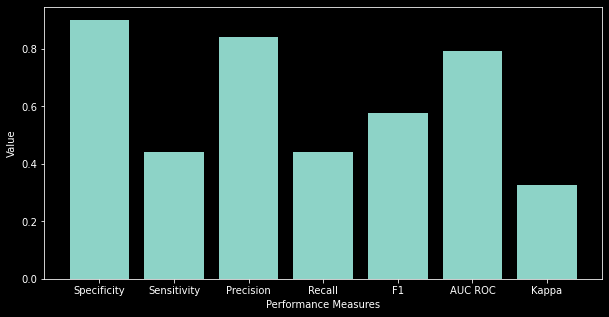

In [100]:
plt.figure(figsize=(10, 5))
plt.bar(['Specificity', 'Sensitivity', 'Precision', 'Recall', 'F1', 'AUC ROC', 'Kappa'], 
         [specificity, sensitivity, precision, recall, f1, lr_auc, kappa])
plt.xlabel('Performance Measures')
plt.ylabel('Value')
plt.show()

## MultinomialNB

In [101]:
mnb = MultinomialNB()

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

mnb.fit(X_train1, Y_train)

MultinomialNB()

In [103]:
y_pred = mnb.predict(X_test1)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [104]:
mnb.score(X_test1, Y_test)

0.615

In [105]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.78      0.65        91
           1       0.72      0.48      0.57       109

    accuracy                           0.61       200
   macro avg       0.64      0.63      0.61       200
weighted avg       0.65      0.61      0.61       200



In [106]:
mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [107]:
confusion_matrix(Y_test, y_pred)

array([[71, 20],
       [57, 52]], dtype=int64)

In [108]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

In [109]:
specificity = tn / (tn+fp)
print('The specificity score is {}'.format(specificity))

The specificity score is 0.7802197802197802


In [110]:
sensitivity = tp / (tp+fn)
print('The sensitivty score is {}'.format(sensitivity))

The sensitivty score is 0.47706422018348627


In [111]:
precision = tp / (tp+fp)
print('The precision score is {}'.format(precision))

The precision score is 0.7222222222222222


In [112]:
recall = tp / (tp+fn)
print('The recall score is {}'.format(recall))

The recall score is 0.47706422018348627


In [113]:
f1 = (2 * precision * recall)/(precision+recall)
print('The F1 score is {}'.format(f1))

The F1 score is 0.5745856353591161


No Skill: ROC AUC=0.500
MNB: ROC AUC=0.681


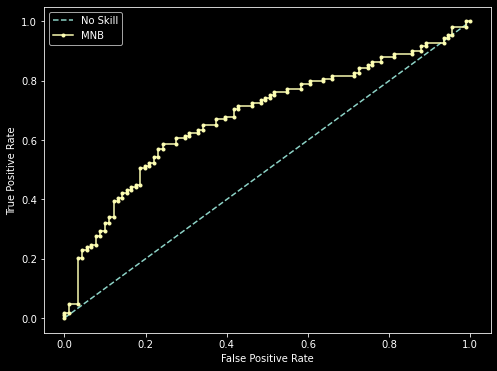

In [114]:
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = mnb.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MNB: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

plt.figure(figsize=(8, 6))

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MNB')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [115]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(Y_test, y_pred)
print('The Kappa Statistics score is {}'.format(kappa))

The Kappa Statistics score is 0.24892703862660948


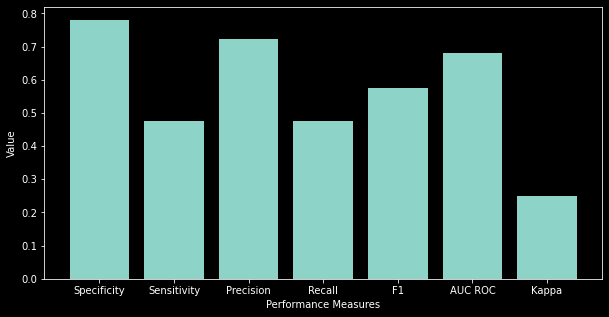

In [116]:
plt.figure(figsize=(10, 5))
plt.bar(['Specificity', 'Sensitivity', 'Precision', 'Recall', 'F1', 'AUC ROC', 'Kappa'], 
         [specificity, sensitivity, precision, recall, f1, lr_auc, kappa])
plt.xlabel('Performance Measures')
plt.ylabel('Value')
plt.show()

## Inference

The dataset used is the Cardiovascular Disease dataset which provides the information that persion will have the disease or not. We go through different features which are directly connected to the final output. There are 12 columns and around 70000 rows in the dataset. We remove the unnecesaary columns from the dataset such as id and keep only 1000 rows for reducing the compute power. The bivariate and univariate analysis is performed to find relationship between different features. The data is tranformed for attaining normal distribution and scaled for the model. The data is divided into Train and Test with the ratio of 0.8:0.2. Standard Scaler is used for standardizing the data. We have created Multi layer perceptron Classifier Model which will help in solving the disease prediction problem by analysing the past data. We have done preprocessing and hypertuning of the data and increased the accuracy from 54% to 78%. The hyperparameter values are shown above. We have attained an accuracy of highest 78% by doing some hypertuning and exploring different feature values. It means that out of 100 people we will predict around 78 people correctly that they will have the disease or not.

- The highest specificity score is 90% for GNB method of Naive Bayes followed by 81% of MLP and 78% of MNB.

- The highest sensitivity score is 75% for MLP followed by 48% of MNB and 44% of GNB.

- The highest Precision score is 84% for GNB followed 82% of MLP and 72% of MNB.

- The highest Recall score is 75% for MLP followed by 48% of MNB and 44% of GNB.

- The highest F1 score is 79% for MLP followed by 58% of GNB and 57% of MNB.

- The highest AUC ROC score is 84% for MLP followed by 79% of GNB and 68% of MNB.

- The highest Kappa score is 56% for MLP followed by 32% of GNB and 24% of MNB

So therefore, we can conclude that MLP is the a better algorithm for the dataset as compared to GNB and MNB methods of Naive Bayes Classifier.